<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Selecci%C3%B3n_de_variables_y_regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar datos
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [3]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [4]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

DESCRIPCION DE LAS VARIABLES

# IMPORTACION DE DATOS

In [21]:
tabla_base = pd.read_csv('tabla_base.csv', sep = ",")

# Normalización

In [6]:
tablabase=tabla_base.copy()
columnascategoricas=["numero_capacitaciones","frecuencia_viajes"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
conteo_de_empleados                int64
ID                                 int64
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
edad>18                           object
porcentaje_aumentosalario          int64
horas_trabajo                      int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
rendimiento     

In [7]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,conteo_de_empleados,ID,nivel_de_cargo,nombre_cargo,estado_civil,...,años_de_trabajo,numero_capacitaciones,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,rendimiento,tiempo_prom_dia,desercion
0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,Healthcare Representative,Married,...,1.0,6,0,3.0,4.0,2.0,3,3,6.8702,0
1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,1,Research Scientist,Single,...,6.0,3,4,3.0,2.0,4.0,2,4,7.3160,1
2,Travel_Frequently,Research & Development,17,4,Other,1,3,4,Sales Executive,Married,...,5.0,2,3,2.0,2.0,1.0,3,3,6.8161,0
3,Non-Travel,Research & Development,2,5,Life Sciences,1,4,3,Human Resources,Married,...,13.0,5,5,4.0,4.0,3.0,2,3,6.7892,0
4,Travel_Rarely,Research & Development,10,1,Medical,1,5,1,Sales Executive,Single,...,9.0,2,4,4.0,1.0,3.0,3,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,5,4,Medical,1,4406,1,Research Scientist,Single,...,10.0,5,2,4.0,1.0,3.0,3,3,8.3169,0
4406,Travel_Rarely,Research & Development,2,4,Medical,1,4407,1,Laboratory Technician,Divorced,...,10.0,2,2,4.0,4.0,3.0,2,3,5.8972,0
4407,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,2,Sales Executive,Married,...,5.0,4,2,1.0,3.0,3.0,3,4,7.1495,0
4408,Travel_Rarely,Sales,18,2,Medical,1,4409,1,Laboratory Technician,Divorced,...,10.0,2,8,4.0,1.0,3.0,2,3,9.1876,0


In [8]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,distancia_domicilio,educacion,conteo_de_empleados,ID,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,horas_trabajo,nivel_de_opciones,...,estado_civil_Married,estado_civil_Single,edad>18_Y,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,6,2,1,1,1,131160,1.0,11,8,0,...,1,0,1,0,0,0,0,0,0,1
1,10,1,1,2,1,41890,0.0,23,8,1,...,0,1,1,0,0,0,1,0,0,0
2,17,4,1,3,4,193280,1.0,15,8,3,...,1,0,1,0,0,1,0,0,0,0
3,2,5,1,4,3,83210,3.0,11,8,3,...,1,0,1,0,0,0,0,0,1,0
4,10,1,1,5,1,23420,4.0,12,8,2,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,5,4,1,4406,1,60290,3.0,17,8,1,...,0,1,1,0,0,0,0,0,1,0
4406,2,4,1,4407,1,26790,2.0,15,8,0,...,0,0,1,0,0,1,0,0,0,0
4407,25,2,1,4408,2,37020,0.0,20,8,0,...,1,0,1,0,0,0,0,1,0,0
4408,18,2,1,4409,1,23980,0.0,14,8,1,...,0,0,1,0,0,1,0,0,0,0


### NORMALIZACION

In [9]:
tablabase1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   distancia_domicilio                     4410 non-null   int64  
 1   educacion                               4410 non-null   int64  
 2   conteo_de_empleados                     4410 non-null   int64  
 3   ID                                      4410 non-null   int64  
 4   nivel_de_cargo                          4410 non-null   int64  
 5   ingresos_mensuales                      4410 non-null   int64  
 6   empresas_anteriores                     4410 non-null   float64
 7   porcentaje_aumentosalario               4410 non-null   int64  
 8   horas_trabajo                           4410 non-null   int64  
 9   nivel_de_opciones                       4410 non-null   int64  
 10  años_de_trabajo                         4410 non-null   floa

In [10]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_jefe_actual","implicacion_laboral"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

In [11]:
from sklearn.metrics import accuracy_score
# Entrenamiento del modelo
modelo = LogisticRegression()
# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)
# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.859


In [12]:
y_pred = modelo.predict(X_test_std)
# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.868


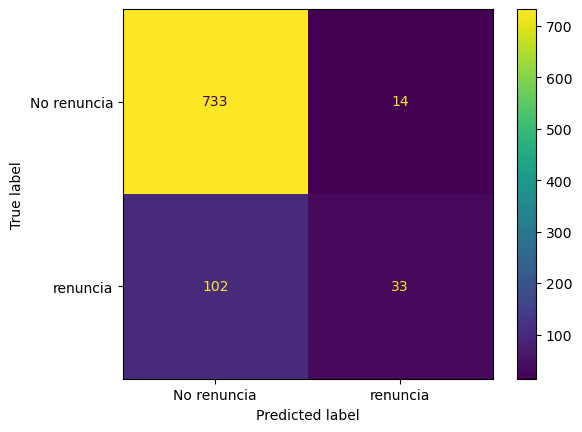

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [14]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.7021276595744681
Recall: 0.24444444444444444
Especificidad: 0.9812583668005355
F1 score: 0.3626373626373626


In [ ]:
# Precision: Un 70 % de las personas que el modelo predijo que iban a renunciar a su trabajo realmente renunciaron, el 30% de las veces el modelo se equivocara cuando predice si un empleado renunciara
# Recall: del total de empleados que renunciaron a su trabajo el modelo es capaz de identificar el 24%
# f1:
#Especificidad: del total de empleados que no renunciaron a su trabajo el modelo es capaz de indetificar el 36%

In [15]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.13
RMSE 0.36
MAE: 0.13
MAPE: 71485708370960.38
R2: -0.01
R2-adjusted: -0.08


# modelo2

# Penalizar clases mayoritarias y balanceo de clases

In [16]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.723


In [17]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el entrenamiento: 0.713


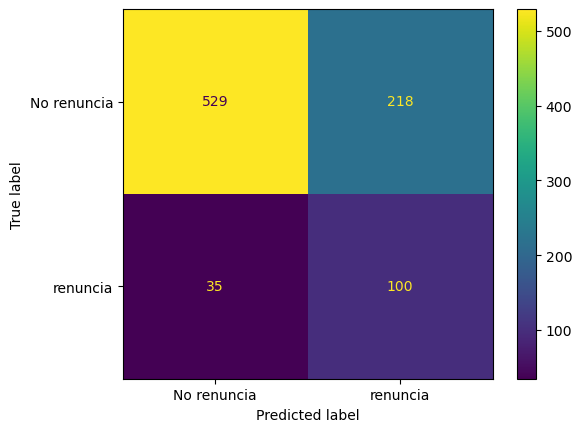

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

In [19]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.31446540880503143
Recall: 0.7407407407407407
Especificidad: 0.7081659973226239
F1 score: 0.44150110375275936


In [ ]:
# Precision: Un 31 % de las personas que el modelo predijo que iban a renunciar a su trabajo realmente renunciaron, el 69% de las veces el modelo se equivocara cuando predice si un empleado renunciara
# Recall: del total de empleados que renunciaron a su trabajo el modelo es capaz de identificar el 74%
# f1:
#Especificidad: del total de empleados que no renunciaron a su trabajo el modelo es capaz de indetificar el 44%

In [20]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred1))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred1))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred1))
print("R2: %.2f" % r2_score(y_test, y_pred1))

# R2 ajustado
r2 = r2_score(y_test, y_pred1)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.29
RMSE 0.54
MAE: 0.29
MAPE: 1113134601776381.12
R2: -1.21
R2-adjusted: -1.35


# REGULARIZACION

# SELECCION DE VARIABLEs

## UMBRAL DE VARIANZA- SOLO PARA NUMERICAS



## PARA CATEGORICAS ES MAS DESDE LO GRAFICO

## SELECCION UNIVARIANTE

## PARA VARIABLE DEPENDIENTE CATEGORICO